# pandas 进阶修炼 ｜早起Python
<br>

**本习题由公众号【早起Python & 可视化图鉴】 原创，转载及其他形式合作请与我们联系（微信号`sshs321`)，未经授权严禁搬运及二次创作，侵权必究！**



本习题基于 `pandas` 版本 `1.1.3`，所有内容应当在 `Jupyter Notebook` 中执行以获得最佳效果。

不同版本之间写法可能会有少许不同，如若碰到此情况，你应该学会如何自行检索解决。

## 6 - 数据分组与聚合



<br>

**<font color = '#5172F0'><font size=3.5>必读👇👇👇**</font>

在前面 5 节的习题中，大多是关于利用 pandas 进行**数据处理**的操作。

现在，终于来到**数据分析**部分。

而**数据的分组与聚合**，也是在数据分析中十分高频的过程。

本节习题我整理了一些利用 pandas 进行数据的分组与聚合的常用操作。

注意，为了更清晰的表达我的问题，本节习题中大部分习题会**保留运行结果**，也是我题目预期产生的结果，如果不理解题目所问，可以进行参考。

## 初始化

<br>

该 `Notebook` 版本为**习题+答案版**


请执行下方单元格以初始化读取本节习题的答案

执行完毕后，你可以使用 `ans(1)` 来查看第 1 题的参考解答，其余习题类似。

注意：所有答案并非固定（唯一），我提供的答案仅供参考（并非推荐答案或者最优解）

如果发现任何错误或者你有更好的解答，可以微信搜索公众号「早起Python」提交以获得奖励！


In [1]:
import sys
sys.path.append('../document/')
from inits import initialize, ans
res = initialize("../document/answer-6.txt")

***************正在初始化***************
*************读取到配置文件*************
***************初始化成功***************


## 加载数据

In [83]:
import pandas as pd

df = pd.read_csv("某招聘网站数据.csv",parse_dates=['createTime'])

In [154]:
df.head(5)

,positionName,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,createTime,district,salary,workYear,jobNature,education,positionAdvantage,imState,score,matchScore,famousCompany,平均薪资水平
0,数据分析,50-150人,"移动互联网,电商",A轮,"['绩效奖金', '带薪年假', '定期体检', '弹性工作']",产品|需求|项目类,数据分析,数据分析,2020-03-16 11:00:00,余杭区,37500,1-3年,全职,本科,五险一金、弹性工作、带薪年假、年度体检,today,233,15.101875,False,33583.333333
1,数据建模,150-500人,电商,B轮,"['年终奖金', '做五休二', '六险一金', '子女福利']",开发|测试|运维类,数据开发,建模,2020-03-16 11:08:00,滨江区,15000,3-5年,全职,本科,"六险一金,定期体检,丰厚年终",disabled,176,32.559414,False,31428.571429
2,数据分析,2000人以上,"移动互联网,企业服务",上市公司,"['节日礼物', '年底双薪', '股票期权', '带薪年假']",产品|需求|项目类,数据分析,数据分析,2020-03-16 10:33:00,江干区,3500,1-3年,全职,本科,五险一金 周末双休 不加班 节日福利,today,80,14.972357,False,25250.000000
3,数据分析,500-2000人,电商,D轮及以上,"['生日趴', '每月腐败基金', '每月补贴', '年度旅游']",开发|测试|运维类,数据开发,数据分析,2020-03-16 10:10:00,江干区,45000,3-5年,全职,本科,年终奖等,threeDays,68,12.874153,True,25250.000000
4,数据分析,2000人以上,物流丨运输,上市公司,"['技能培训', '免费班车', '专项奖金', '岗位晋升']",产品|需求|项目类,数据分析,数据分析,2020-03-16 09:56:00,余杭区,30000,3-5年,全职,大专,五险一金,disabled,66,12.755375,True,33583.333333


## 分组

### 1 - 分组统计｜均值

计算各区(`district`)的薪资(`salary`)均值

In [151]:
df.groupby('district').agg({'salary':'mean'})
# df[['district','salary']].groupby(by='district').mean()

,salary
district,
上城区,26250.000000
下沙,30000.000000
余杭区,33583.333333
拱墅区,28500.000000
江干区,25250.000000
滨江区,31428.571429
萧山区,36250.000000
西湖区,30893.939394


### 2 - 分组统计｜取消索引

重新按照上一题要求进行分组，但不使用 `district` 做为索引

In [152]:
# df.groupby('district').agg({'salary':'mean'}).reset_index()
df.groupby("district", as_index=False)['salary'].mean()

,district,salary
0,上城区,26250.000000
1,下沙,30000.000000
2,余杭区,33583.333333
3,拱墅区,28500.000000
4,江干区,25250.000000
5,滨江区,31428.571429
6,萧山区,36250.000000
7,西湖区,30893.939394


### 3 - 分组统计｜排序

计算并提取平均薪资最高的区

In [86]:
df.groupby('district').agg({'salary':'mean'}).sort_values(by='salary',ascending=False).head(1)

,salary
district,
萧山区,36250.0


### 4 - 分组统计｜频率

计算不同行政区(`district`)，不同规模公司(`companySize`)出现的次数

In [87]:
# df.groupby(by=['district','companySize']).size()
pd.DataFrame(df.groupby('district')['companySize'].value_counts())

companySize
district companySize             
上城区      50-150人                2
下沙       150-500人               1
余杭区      2000人以上               14
         150-500人              13
         50-150人                7
         500-2000人              2
拱墅区      500-2000人              2
         2000人以上                1
         50-150人                1
江干区      2000人以上                2
         500-2000人              2
滨江区      150-500人              14
         2000人以上                6
         500-2000人              1
萧山区      500-2000人              3
         50-150人                1
西湖区      2000人以上               11
         500-2000人              9
         150-500人               7
         50-150人                5
         15-50人                 1

### 5 - 分组统计｜修改索引名

将上一题的索引名修改为
- district -> 行政区
- companySize -> 公司规模

In [88]:
pd.DataFrame(df.groupby('district')['companySize'].value_counts()).rename_axis(['行政区','公司规模'])

companySize
行政区 公司规模                  
上城区 50-150人              2
下沙  150-500人             1
余杭区 2000人以上             14
    150-500人            13
    50-150人              7
    500-2000人            2
拱墅区 500-2000人            2
    2000人以上              1
    50-150人              1
江干区 2000人以上              2
    500-2000人            2
滨江区 150-500人            14
    2000人以上              6
    500-2000人            1
萧山区 500-2000人            3
    50-150人              1
西湖区 2000人以上             11
    500-2000人            9
    150-500人             7
    50-150人              5
    15-50人               1

### 6 - 分组统计｜计数

计算上一题，每个区出现的公司数量

In [89]:
df.groupby('district')['companySize'].count()

district
上城区     2
下沙      1
余杭区    36
拱墅区     4
江干区     4
滨江区    21
萧山区     4
西湖区    33
Name: companySize, dtype: int64

### 7 - 分组查看｜全部

将数据按照 `district`、`salary` 进行分组，并查看各分组内容

In [90]:
df.groupby(["district",'salary']).groups

{('上城区', 22500): [81], ('上城区', 30000): [97], ('下沙', 30000): [31], ('余杭区', 7500): [84], ('余杭区', 20000): [52, 103], ('余杭区', 22500): [23, 51], ('余杭区', 25000): [62], ('余杭区', 27500): [24, 49], ('余杭区', 29000): [93], ('余杭区', 30000): [4, 10, 13, 18, 59, 61, 65, 68, 74, 76, 86, 92, 94], ('余杭区', 35000): [101], ('余杭区', 37500): [0, 32, 38, 39, 41], ('余杭区', 40000): [60, 87], ('余杭区', 45000): [25], ('余杭区', 50000): [5, 64, 90], ('余杭区', 60000): [8, 82], ('拱墅区', 24000): [72], ('拱墅区', 30000): [54, 89, 96], ('江干区', 3500): [2], ('江干区', 22500): [45], ('江干区', 30000): [73], ('江干区', 45000): [3], ('滨江区', 7500): [83], ('滨江区', 15000): [1], ('滨江区', 20000): [21, 40], ('滨江区', 22500): [37], ('滨江区', 30000): [22, 53, 55, 58, 67, 80, 102], ('滨江区', 32500): [26], ('滨江区', 37500): [17, 28, 57, 77], ('滨江区', 42500): [91], ('滨江区', 45000): [43, 47], ('滨江区', 50000): [44], ('萧山区', 25000): [100], ('萧山区', 30000): [6], ('萧山区', 45000): [66, 69], ('西湖区', 6500): [71], ('西湖区', 20000): [12], ('西湖区', 21500): [104], ('西湖区', 22500): [48, 70

### 8 - 分组查看｜指定

将数据按照 `district`、`salary` 进行分组，并查看西湖区薪资为 30000 的工作

In [91]:
# df.groupby(["district",'salary']).get_group(("西湖区",30000))

df[df['salary']==30000].sort_values(by=['district','salary'])

,positionName,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,createTime,district,salary,workYear,jobNature,education,positionAdvantage,imState,score,matchScore,famousCompany
97,旅游大数据分析师（杭州）,50-150人,"数据服务,企业服务",A轮,"['年底双薪', '股票期权', '午餐补助', '定期体检']",开发|测试|运维类,数据开发,数据治理,2020-03-12 16:38:00,上城区,30000,1-3年,全职,本科,管理扁平 潜力项目 五险一金 周末双休,sevenDays,1,0.826756,False
31,店铺数据分析师,150-500人,"移动互联网,电商",B轮,"['技能培训', '带薪年假', '绩效奖金', '岗位晋升']",市场|商务类,市场|营销,商业数据分析,2020-03-16 11:26:00,下沙,30000,3-5年,全职,大专,福利齐全 晋升空间大 精英团队 双休,threeDays,6,1.097846,False
4,数据分析,2000人以上,物流丨运输,上市公司,"['技能培训', '免费班车', '专项奖金', '岗位晋升']",产品|需求|项目类,数据分析,数据分析,2020-03-16 09:56:00,余杭区,30000,3-5年,全职,大专,五险一金,disabled,66,12.755375,True
10,数据分析师,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",产品|需求|项目类,数据分析,数据分析,2020-03-16 10:57:00,余杭区,30000,不限,全职,本科,六险一金 旅游 带薪年假 培训发展 双休,today,17,1.161869,False
13,资深数据分析师,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",开发|测试|运维类,数据开发,数据分析,2020-03-16 10:57:00,余杭区,30000,3-5年,全职,本科,六险一金 旅游 带薪年假 培训发展 双休,today,16,1.075559,False
18,数据建模专家-杭州-01546,500-2000人,"信息安全,数据服务",D轮及以上,"['技能培训', '股票期权', '绩效奖金', '岗位晋升']",开发|测试|运维类,数据开发,建模,2020-03-16 11:17:00,余杭区,30000,3-5年,全职,本科,"六险一金,年终奖,带薪年假",today,12,3.033237,False
59,数据分析实习生,150-500人,"企业服务,数据服务",B轮,"['股票期权', '绩效奖金', '带薪年假', '弹性工作']",开发|测试|运维类,数据开发,数据分析,2020-03-16 11:33:00,余杭区,30000,应届毕业生,实习,本科,牛人团队 成长空间 期权激励 独当一面,disabled,4,1.110971,False
61,高级财务数据分析师,2000人以上,汽车丨出行,D轮及以上,"['技能培训', 'Geek', '开放', '扁平管理']",综合职能|高级管理,财务,财务,2020-03-16 10:45:00,余杭区,30000,3-5年,全职,本科,餐补，带薪年假，节日礼品，定期体检,today,4,0.856464,True
65,解决方案顾问/数据分析师,150-500人,"企业服务,数据服务",B轮,"['股票期权', '绩效奖金', '带薪年假', '弹性工作']",产品|需求|项目类,数据分析,数据分析,2020-03-16 11:33:00,余杭区,30000,1-3年,全职,本科,牛人团队 成长空间 期权激励 独当一面,disabled,4,0.825481,False
68,数据分析负责人 or 数据分析师,2000人以上,"金融,电商",上市公司,"['带薪年假', '定期体检', '免费班车', '领导好']",开发|测试|运维类,数据开发,数据分析,2020-03-16 10:04:00,余杭区,30000,3-5年,全职,本科,PB量级数据 核心项目 食堂班车健身房,disabled,4,0.826260,True


### 9 - 分组规则｜通过匿名函数1

根据 createTime 列，计算每天不同 行政区 新增的岗位数量

In [97]:
pd.DataFrame(df.groupby(df.createTime.apply(lambda x:x.day))['district'].value_counts().rename_axis(['发布日','行政区']))

district
发布日 行政区          
9   余杭区         1
10  拱墅区         1
11  萧山区         1
    西湖区         1
12  上城区         1
13  西湖区         1
14  西湖区         3
    余杭区         1
    拱墅区         1
    滨江区         1
15  余杭区         6
    滨江区         2
    西湖区         1
16  余杭区        28
    西湖区        27
    滨江区        18
    江干区         4
    萧山区         3
    拱墅区         2
    上城区         1
    下沙          1

### 10 - 分组规则｜通过匿名函数2

计算各行政区的企业领域（industryField）包含电商的总数



In [145]:
# pd.DataFrame(df[df['industryField'].str.contains('电商')].groupby('district')['industryField'].count())
df.groupby("district", sort=False)["industryField"].apply(lambda x: x.str.contains("电商").sum())

district
余杭区    9
滨江区    9
江干区    2
萧山区    3
西湖区    4
下沙     1
拱墅区    0
上城区    0
Name: industryField, dtype: int64

### 11 - 分组规则｜通过内置函数

通过 positionName 的长度进行分组，并计算不同长度岗位名称的薪资均值

In [146]:
df.groupby(df['positionName'].str.len())['salary'].mean()
# df.set_index("positionName").groupby(len)['salary'].mean()

positionName
4     30125.000000
5     34083.333333
6     32954.545455
7     29816.666667
8     31875.000000
9     29375.000000
10    30000.000000
11    34166.666667
12    29583.333333
13    38833.333333
14    40000.000000
15    26000.000000
16    28750.000000
17    40000.000000
18    25750.000000
19    45000.000000
21    21500.000000
23    60000.000000
Name: salary, dtype: float64

### 12 - 分组规则｜通过字典

将 score 和 matchScore 的和记为总分，与 salary 列同时进行分组，并查看结果

In [139]:
# df.groupby([df['score'] + df['matchScore'], 'salary']).size()
df.groupby({'salary':'薪资','score':'总分','matchScore':'总分'}, axis=1).sum()

,总分,薪资
0,248.101875,37500
1,208.559414,15000
2,94.972357,3500
3,80.874153,45000
4,78.755375,30000
...,...,...
100,0.314259,25000
101,0.283276,35000
102,0.256719,30000
103,0.281062,20000


### 13 - 分组规则｜通过多列

计算不同 工作年限（`workYear`）和 学历（`education`）之间的薪资均值

In [150]:
pd.DataFrame(df.groupby(['workYear','education'])['salary'].mean())

salary
workYear education              
1-3年     不限         36250.000000
         本科         31000.000000
         硕士         36875.000000
3-5年     不限         30312.500000
         大专         28125.000000
         本科         31828.125000
5-10年    不限         26250.000000
         本科         28423.076923
不限       不限         35000.000000
         本科         35625.000000
应届毕业生    不限         32500.000000
         本科         33833.333333

### 14 - 分组转换｜ transform

在原数据框 df 新增一列，数值为该区的平均薪资水平

In [153]:
df['平均薪资水平'] = df.groupby('district')['salary'].transform('mean')

### 15 - 分组过滤｜filter


提取平均工资小于 30000 的行政区的全部数据

In [184]:
df.groupby('district').filter(lambda x:x['salary'].mean()<30000)

,positionName,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,createTime,district,salary,workYear,jobNature,education,positionAdvantage,imState,score,matchScore,famousCompany,平均薪资水平
2,数据分析,2000人以上,"移动互联网,企业服务",上市公司,"['节日礼物', '年底双薪', '股票期权', '带薪年假']",产品|需求|项目类,数据分析,数据分析,2020-03-16 10:33:00,江干区,3500,1-3年,全职,本科,五险一金 周末双休 不加班 节日福利,today,80,14.972357,False,25250.0
3,数据分析,500-2000人,电商,D轮及以上,"['生日趴', '每月腐败基金', '每月补贴', '年度旅游']",开发|测试|运维类,数据开发,数据分析,2020-03-16 10:10:00,江干区,45000,3-5年,全职,本科,年终奖等,threeDays,68,12.874153,True,25250.0
45,金融数据分析师,500-2000人,电商,D轮及以上,"['生日趴', '每月腐败基金', '每月补贴', '年度旅游']",开发|测试|运维类,数据开发,数据分析,2020-03-16 10:36:00,江干区,22500,3-5年,全职,本科,"平台大,机会多,重点项目",today,5,0.995890,True,25250.0
54,数据分析专家,50-150人,"移动互联网,消费生活",未融资,"['年底双薪', '专项奖金', '美女多', '弹性工作']",产品|需求|项目类,高端产品职位,数据分析专家,2020-03-16 09:38:00,拱墅区,30000,5-10年,全职,本科,领导NICE,today,5,0.962693,False,28500.0
72,BI数据分析师,500-2000人,"移动互联网,金融",B轮,"['弹性工作', '扁平管理', '领导好', '五险一金']",产品|需求|项目类,数据分析,BI,2020-03-16 09:46:00,拱墅区,24000,5-10年,全职,本科,带薪年假 / 五险一金 / 节假日福利,threeDays,4,0.821054,False,28500.0
73,数据分析师,2000人以上,"消费生活,硬件",上市公司,"['定期体检', '五险一金', '专项奖金', '骨干家庭公寓']",产品|需求|项目类,数据分析,数据分析,2020-03-16 08:07:00,江干区,30000,3-5年,全职,本科,大平台免费住宿，免费班车，出国游学等,today,4,0.827694,True,25250.0
81,商业数据分析师（阿里数据银行）,50-150人,"移动互联网,广告营销",天使轮,"['节日礼物', '带薪年假', '绩效奖金', '五险一金']",市场|商务类,市场|营销,商业数据分析,2020-03-16 09:09:00,上城区,22500,1-3年,全职,本科,五险一金 周末双休 福利丰厚 带薪年假,today,3,0.637369,False,26250.0
89,数据分析,500-2000人,其他,未融资,[],产品|需求|项目类,数据分析,数据分析,2020-03-10 11:16:00,拱墅区,30000,1-3年,全职,本科,数据分析,threeDays,1,1.824001,False,28500.0
96,数据分析专员,2000人以上,"移动互联网,广告营销",上市公司,"['节日礼物', '股票期权', '带薪年假', '岗位晋升']",产品|需求|项目类,数据分析,数据分析,2020-03-14 15:10:00,拱墅区,30000,1-3年,全职,不限,"股票期权,绩效奖金,弹性工作,五险一金",threeDays,1,0.460323,False,28500.0
97,旅游大数据分析师（杭州）,50-150人,"数据服务,企业服务",A轮,"['年底双薪', '股票期权', '午餐补助', '定期体检']",开发|测试|运维类,数据开发,数据治理,2020-03-12 16:38:00,上城区,30000,1-3年,全职,本科,管理扁平 潜力项目 五险一金 周末双休,sevenDays,1,0.826756,False,26250.0


微信搜索公众号「早起Python」，关注后可以获得更多资源！

### 16 - 分组可视化

<br>

对杭州市各区公司数量进行分组，并使用柱状图进行可视化

<function matplotlib.pyplot.show(close=None, block=None)>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
c:\users\zhongbiao\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\zhongbiao\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\zhongbiao\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\zhongbiao\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 19979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\zhongbiao\appdata\local\programs\python\python37\lib\site-packages\matplotlib\back

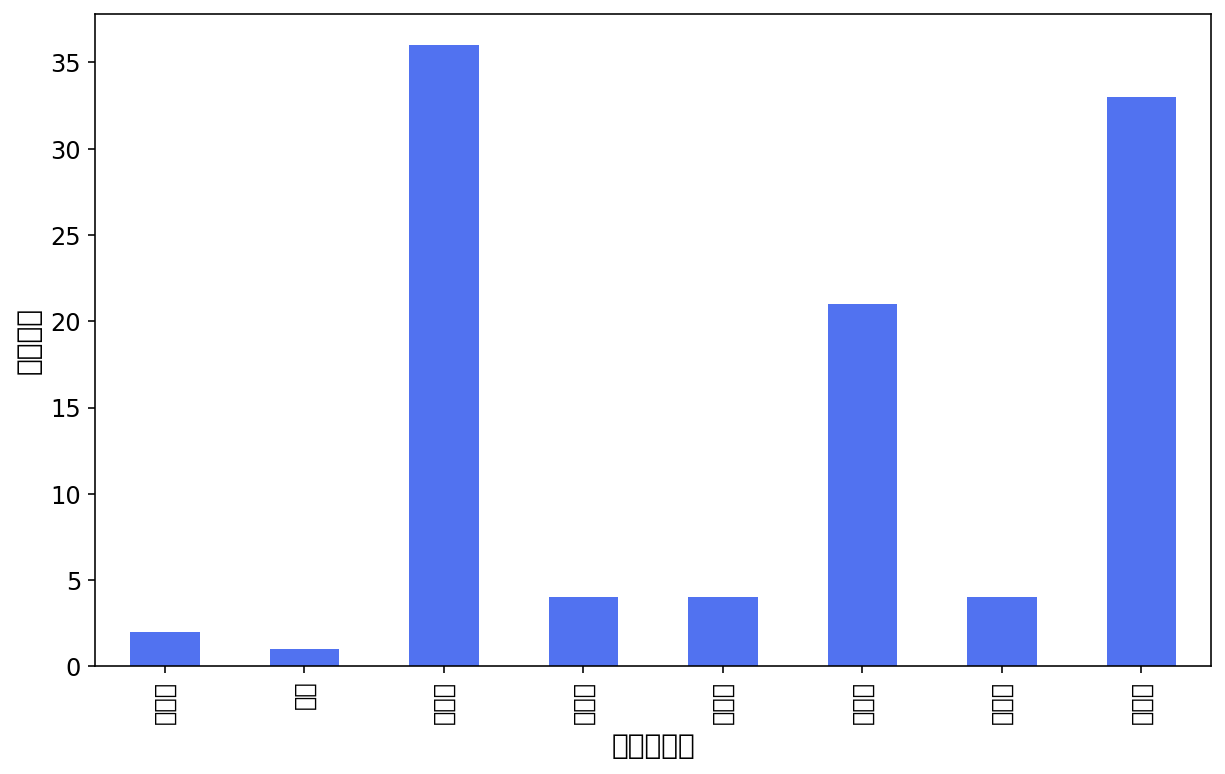

In [189]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.sans-serif'] = ['Songti SC']

df.groupby('district')['positionName'].count().plot(kind='bar',figsize=(10,6),color='#5172F0',fontsize=12)
plt.ylabel('公司数量', fontsize=14)
plt.xlabel('杭州市各区',fontsize=14)
plt.show

## 聚合

### 17 - 聚合统计

分组计算不同行政区，薪水的最小值、最大值和平均值

In [203]:
import numpy as np
df.groupby('district')['salary'].agg([min, max, np.mean])

,min,max,mean
district,,,
上城区,22500,30000,26250.000000
下沙,30000,30000,30000.000000
余杭区,7500,60000,33583.333333
拱墅区,24000,30000,28500.000000
江干区,3500,45000,25250.000000
滨江区,7500,50000,31428.571429
萧山区,25000,45000,36250.000000
西湖区,6500,45000,30893.939394


### 18 - 聚合统计｜修改列名

将上一题的列名（包括索引名）修改为中文

In [213]:
import numpy as np
df.groupby('district')['salary'].agg([min, max, np.mean]).rename(columns={'min':'最低工资','max':'最高工资','mean':'平均工资'}).rename_axis(['行政区'])
# df.groupby('district').agg(最低工资=('salary','min'), 最高工资=('salary','max'),平均工资=('salary','mean')).rename_axis(['行政区'])

,最低工资,最高工资,平均工资
行政区,,,
上城区,22500,30000,26250.000000
下沙,30000,30000,30000.000000
余杭区,7500,60000,33583.333333
拱墅区,24000,30000,28500.000000
江干区,3500,45000,25250.000000
滨江区,7500,50000,31428.571429
萧山区,25000,45000,36250.000000
西湖区,6500,45000,30893.939394


### 19 - 聚合统计｜组合

对不同岗位(`positionName`)进行分组，并统计其薪水(`salary`)中位数和得分(`score`)均值

In [214]:
df.groupby('positionName').agg({'salary':'median', 'score':'mean'})

,salary,score
positionName,,
BI数据分析师,20000,2.666667
bi数据分析师,40000,5.000000
业务与数据分析师,30000,3.000000
产品经理/数据分析（核心业务）-2020届春招,60000,3.000000
产品运营（偏数据分析）,27500,15.000000
商业数据分析,35000,0.000000
商业数据分析师,37500,5.000000
商业数据分析师（阿里数据银行）,22500,3.000000
大数据分析工程师(J11108),30000,17.000000


### 20 -聚合统计｜多层

对不同行政区进行分组，并统计薪水的均值、中位数、方差，以及得分的均值

In [232]:
df.groupby('district').agg({'salary':['min', 'mean', 'std'], 'score':['mean']})

salary                                  score
            min          mean           std       mean
district                                              
上城区       22500  26250.000000   5303.300859   2.000000
下沙        30000  30000.000000           NaN   6.000000
余杭区        7500  33583.333333  10857.847721  15.166667
拱墅区       24000  28500.000000   3000.000000   2.750000
江干区        3500  25250.000000  17255.433927  39.250000
滨江区        7500  31428.571429  10445.436461  12.952381
萧山区       25000  36250.000000  10307.764064  18.250000
西湖区        6500  30893.939394   7962.566302   8.060606

### 21 - 聚合统计｜自定义函数

在 18 题基础上，在聚合计算时新增一列计算最大值与平均值的差值

In [238]:
def myfunc(x):
    return x.max()-x.mean()
df.groupby('district').agg(最低工资=('salary','min'), 最高工资=('salary','max'),平均工资=('salary','mean'),最大值与均值差值=('salary',myfunc)).rename_axis(['行政区'])

,最低工资,最高工资,平均工资,最大值与均值差值
行政区,,,,
上城区,22500,30000,26250.000000,3750.000000
下沙,30000,30000,30000.000000,0.000000
余杭区,7500,60000,33583.333333,26416.666667
拱墅区,24000,30000,28500.000000,1500.000000
江干区,3500,45000,25250.000000,19750.000000
滨江区,7500,50000,31428.571429,18571.428571
萧山区,25000,45000,36250.000000,8750.000000
西湖区,6500,45000,30893.939394,14106.060606


![](http://liuzaoqi.oss-cn-beijing.aliyuncs.com/2021/09/16/16317972442543.jpg?域名/sample.jpg?x-oss-process=style/stylename)